<a href="https://colab.research.google.com/github/SankithaDevatha/Python/blob/main/Assessment2-corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.core.fromnumeric import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Step 1: Load the dataset and display summary statistics
digits = load_digits()
data = digits.data
columns = digits.feature_names
df1 = pd.DataFrame(data, columns=columns)
df = df1.iloc[:,0:4]
df.dropna()
print(df)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3
0           0.0        0.0        5.0       13.0
1           0.0        0.0        0.0       12.0
2           0.0        0.0        0.0        4.0
3           0.0        0.0        7.0       15.0
4           0.0        0.0        0.0        1.0
...         ...        ...        ...        ...
1792        0.0        0.0        4.0       10.0
1793        0.0        0.0        6.0       16.0
1794        0.0        0.0        1.0       11.0
1795        0.0        0.0        2.0       10.0
1796        0.0        0.0       10.0       14.0

[1797 rows x 4 columns]


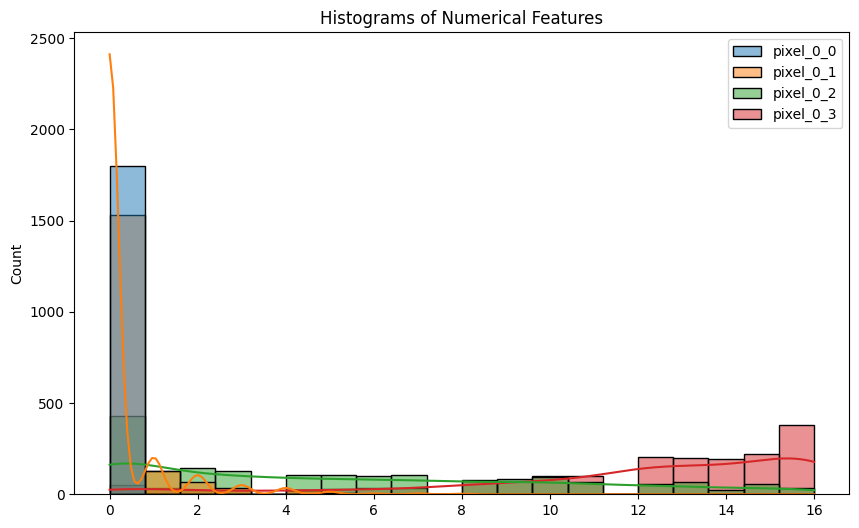

In [2]:
# Step 2: Visualize the distributions of numerical features using histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, bins=20, kde=True)
plt.title("Histograms of Numerical Features")
plt.show()

In [3]:
# Step 3: Implement and compare scaling techniques
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

data_standard = scaler_standard.fit_transform(df)
data_minmax = scaler_minmax.fit_transform(df)

In [4]:
# Step 5: Normalize the dataset using L2 normalization and display normalized data
data_normalized = normalize(df, norm='l2')
df_normalized = pd.DataFrame(data_normalized, columns=columns[:4])
print(df_normalized.head())

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3
0        0.0        0.0   0.358979   0.933346
1        0.0        0.0   0.000000   1.000000
2        0.0        0.0   0.000000   1.000000
3        0.0        0.0   0.422885   0.906183
4        0.0        0.0   0.000000   1.000000


In [7]:
# Step 6: Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(df, digits.target, test_size=0.2, random_state=42)

# Apply scaling techniques to both subsets
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [8]:
# Step 7: Train a simple Linear Regression model and compare performance
model_scaled_standard = LinearRegression()
model_scaled_minmax = LinearRegression()

model_scaled_standard.fit(X_train_scaled_standard, y_train)
model_scaled_minmax.fit(X_train_scaled_minmax, y_train)

y_pred_scaled_standard = model_scaled_standard.predict(X_test_scaled_standard)
y_pred_scaled_minmax = model_scaled_minmax.predict(X_test_scaled_minmax)

mse_scaled_standard = mean_squared_error(y_test, y_pred_scaled_standard)
mse_scaled_minmax = mean_squared_error(y_test, y_pred_scaled_minmax)

print("MSE with StandardScaler:", mse_scaled_standard)
print("MSE with Min-Max Scaler:", mse_scaled_minmax)

MSE with StandardScaler: 7.819009627201428
MSE with Min-Max Scaler: 7.819009627201428
